In [1]:
import new_pipe
import has_violation
import pandas as pd

import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [2]:
# this is the features dataframe
features_df = pd.read_csv("small_data_cleaned.csv")

In [3]:
features_df.drop("Unnamed: 0", inplace=True, axis=1)
features_df.drop("Unnamed: 0_x", inplace=True, axis=1)
features_df.drop("Unnamed: 0_y", inplace=True, axis=1)
features_df.drop("year", inplace=True, axis=1)

In [4]:
features_df.shape

(159967, 38)

In [ ]:
list(features_df)

In [ ]:
features_df.info()

In [5]:
import epa_pipeline as ep

In [6]:
preds = pd.read_csv("esther_2_predictions.csv")

In [7]:
preds.shape

(98008, 82)

In [ ]:
preds.info()

In [8]:
preds_trim = preds["ET{'criterion': 'gini', 'n_jobs': -1, 'min_samples_split': 10, 'n_estimators': 1000, 'max_depth': 50}_at_0.2pct"]

In [9]:
preds_trim = preds_trim.to_frame()# .reset_index()

In [ ]:
preds_trim.info()

In [10]:
preds_trim = preds_trim.rename(columns={"ET{'criterion': 'gini', 'n_jobs': -1, 'min_samples_split': 10, 'n_estimators': 1000, 'max_depth': 50}_at_0.2pct": 'score'})

In [11]:
preds_trim.shape

(98008, 1)

In [ ]:
features_df.shape

In [12]:
preds_all = preds_trim.merge(features_df, left_index=True, right_index=True)

In [13]:
preds_all.shape

(98008, 39)

In [ ]:
preds_all.info()

In [14]:
preds_all["label_value"] = preds_all["HasViolation"].astype(int)

In [15]:
preds_all.shape

(98008, 40)

In [ ]:
preds_all.shape

In [ ]:
preds_all.info()

In [16]:
import numpy as np

In [17]:
def aequitas_prep(df, q):
    # Column names = families_under_poverty_line, median income
    # df["families_under_pl_quartile"] = df["families_under_poverty_line"].quantile([0, .25, .5, .75, 1])
    # df["median_income_quartile"] = df["median income"].quantile([0, .25, .5, .75, 1])  # ([0, 25000, 50000, 100000, 150000])
    # for _, col in enumerate(["median income"]): #, "families_under_poverty_line"]):
        # col_q = col + '_q{}'.format(q)
        # df[col_q] = pd.cut(x=df["median income"],bins=q, labels=False) # pd.qcut(df[col], q, labels=False)
        # TODO: make these into equal buckets
    
    # for families_under_poverty_line
    #buckets = np.linspace(df["median income"].min(), df["median income"].max(), num=q)
    #df["median_income_quantile"] = pd.cut(df["median income"], buckets)
    #df["median_income_quantile"] = df["median_income_quantile"].astype(str)
    
    buckets = np.linspace(df["median income"].min(), df["median income"].max(), num=q)
    df["median_income_quantile"] = pd.cut(df["median income"], buckets)
    df["median_income_quantile"] = df["median_income_quantile"].astype(str)
    
    # white alone, black alone, native alone, asian alone, pacific alone, other alone, two or more
    df["race_majority"] = df[['white alone', 'black alone', 'native alone', 'asian alone', 'pacific alone',
                              'other alone', 'two or more']].idxmax(axis=1)
    return df

In [38]:
preds_all_prepped = aequitas_prep(preds_all,6)

In [39]:
preds_all_prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98008 entries, 0 to 98007
Data columns (total 42 columns):
score                                 98008 non-null int64
ID_NUMBER                             98008 non-null object
YEAR_EVALUATED                        98008 non-null int64
HasViolation                          98008 non-null float64
DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER    98008 non-null float64
NUMBER_VIOLATIONS_IN_ID_NUMBER        98008 non-null float64
IsLQG                                 98008 non-null int64
IsTSDF                                98008 non-null int64
NumInMyState                          98008 non-null float64
NumInMyZIP                            98008 non-null float64
early  ID_NUMBER sum                  98008 non-null float64
early  ID_NUMBER count                98008 non-null float64
last early  ID_NUMBER                 98008 non-null float64
late  ID_NUMBER sum                   98008 non-null float64
late  ID_NUMBER count                 98008 no

In [40]:
df_for_equity = preds_all_prepped.filter(["score", "label_value", "median_income_quantile", "race_majority"])




In [41]:
df_for_equity.shape

(98008, 4)

In [42]:
df_for_equity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98008 entries, 0 to 98007
Data columns (total 4 columns):
score                     98008 non-null int64
label_value               98008 non-null int64
median_income_quantile    98008 non-null object
race_majority             98008 non-null object
dtypes: int64(2), object(2)
memory usage: 3.7+ MB


In [43]:
rf_for_aequitas = df_for_equity.copy(deep=True)

In [44]:
g = Group()
import aequitas.preprocessing as ap

In [45]:
xtab, _ = g.get_crosstabs(rf_for_aequitas)

model_id, score_thresholds 1 {'rank_abs': [19603]}


In [46]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [47]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,19603,median_income_quantile,"(0.0, 50000.2]",10226,41255,9762,1843,39412,464,2307,49174,51481,98008
1,1,binary 0/1,19603,median_income_quantile,"(100000.4, 150000.6]",747,3017,723,107,2910,24,131,3633,3764,98008
2,1,binary 0/1,19603,median_income_quantile,"(150000.6, 200000.8]",52,247,49,6,241,3,9,290,299,98008
3,1,binary 0/1,19603,median_income_quantile,"(200000.8, 250001.0]",10,44,10,3,41,0,3,51,54,98008
4,1,binary 0/1,19603,median_income_quantile,"(50000.2, 100000.4]",7924,31220,7546,1401,29819,378,1779,37365,39144,98008
5,1,binary 0/1,19603,median_income_quantile,nan,644,2622,598,174,2448,46,220,3046,3266,98008
6,1,binary 0/1,19603,race_majority,asian alone,99,355,89,31,324,10,41,413,454,98008
7,1,binary 0/1,19603,race_majority,black alone,1254,5016,1201,242,4774,53,295,5975,6270,98008
8,1,binary 0/1,19603,race_majority,native alone,84,375,82,14,361,2,16,443,459,98008
9,1,binary 0/1,19603,race_majority,other alone,63,265,57,16,249,6,22,306,328,98008


In [48]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,median_income_quantile,"(0.0, 50000.2]",0.20,0.80,0.04,0.95,0.20,0.80,0.96,0.05,0.52,0.20,0.04
1,median_income_quantile,"(100000.4, 150000.6]",0.18,0.80,0.04,0.97,0.20,0.82,0.96,0.03,0.04,0.20,0.03
2,median_income_quantile,"(150000.6, 200000.8]",0.33,0.83,0.02,0.94,0.17,0.67,0.98,0.06,0.00,0.17,0.03
3,median_income_quantile,"(200000.8, 250001.0]",0.00,0.80,0.07,1.00,0.20,1.00,0.93,0.00,0.00,0.19,0.06
4,median_income_quantile,"(50000.2, 100000.4]",0.21,0.80,0.04,0.95,0.20,0.79,0.96,0.05,0.40,0.20,0.05
5,median_income_quantile,nan,0.21,0.80,0.07,0.93,0.20,0.79,0.93,0.07,0.03,0.20,0.07
6,race_majority,asian alone,0.24,0.78,0.09,0.90,0.22,0.76,0.91,0.10,0.01,0.22,0.09
7,race_majority,black alone,0.18,0.80,0.05,0.96,0.20,0.82,0.95,0.04,0.06,0.20,0.05
8,race_majority,native alone,0.12,0.81,0.04,0.98,0.19,0.88,0.96,0.02,0.00,0.18,0.03
9,race_majority,other alone,0.27,0.81,0.06,0.90,0.19,0.73,0.94,0.10,0.00,0.19,0.07


In [49]:
aqp = Plot()

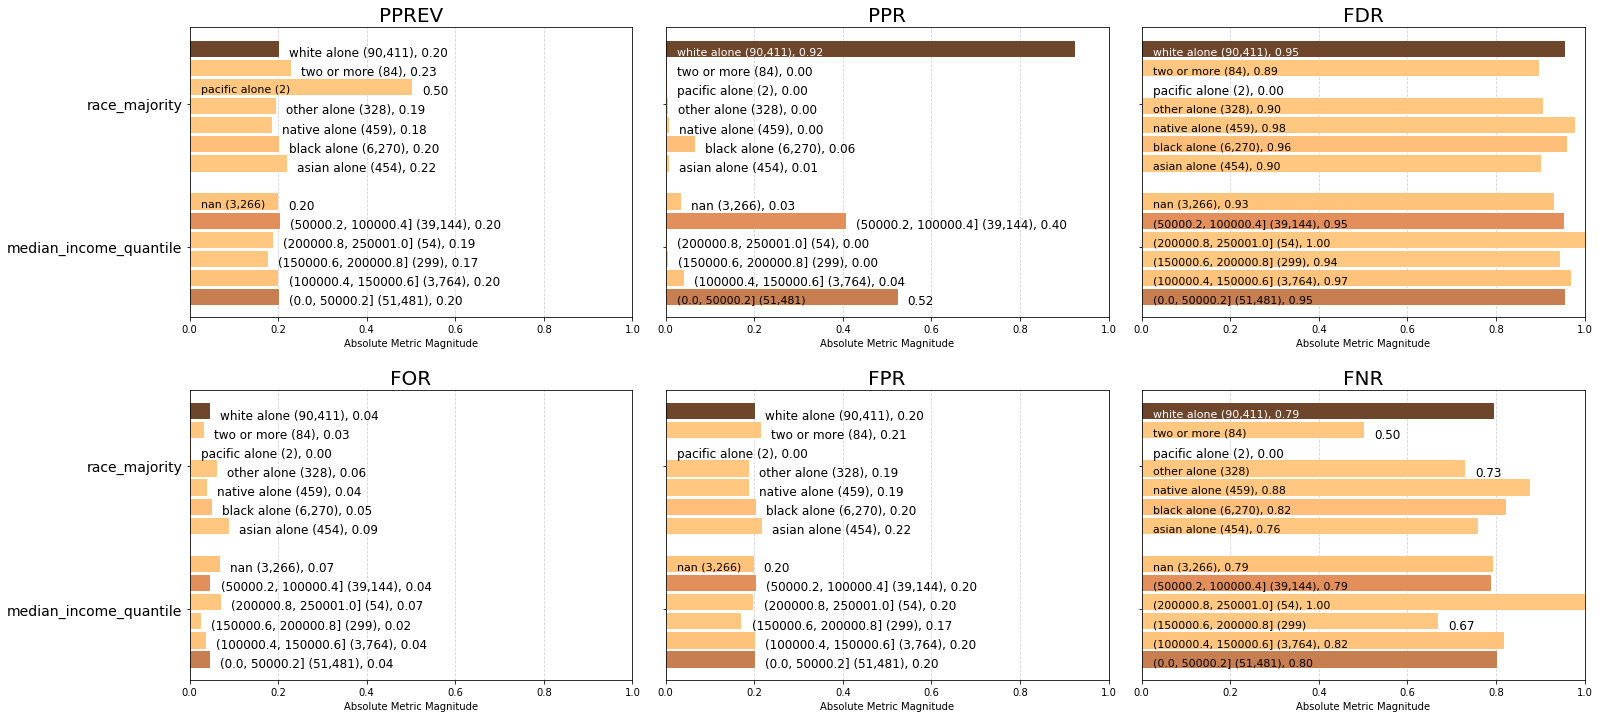

In [50]:
p = aqp.plot_group_metric_all(xtab, ncols=3)

In [51]:
b = Bias()

In [53]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=rf_for_aequitas, ref_groups_dict={'median_income_quantile':'(200000.8, 250001.0]', 'race_majority':'white alone'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,19603,median_income_quantile,"(0.0, 50000.2]",0.201127,0.80148,0.0446734,0.954625,0.19852,0.798873,0.955327,0.0453745,10226,41255,0.521655,0.198636,9762,1843,39412,464,2307,49174,51481,98008,0.0448126,1022.6,1.07264,10,0.954625,0.655209,1.01245,0.798873,10,0.996963,1.02523,"(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]"
1,1,binary 0/1,19603,median_income_quantile,"(100000.4, 150000.6]",0.183206,0.800991,0.0354657,0.967871,0.199009,0.816794,0.964534,0.0321285,747,3017,0.0381064,0.198459,723,107,2910,24,131,3633,3764,98008,0.0348034,74.7,1.07168,10,0.967871,0.520164,1.01495,0.816794,10,0.996355,1.03511,"(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]"
2,1,binary 0/1,19603,median_income_quantile,"(150000.6, 200000.8]",0.333333,0.831034,0.0242915,0.942308,0.168966,0.666667,0.975709,0.0576923,52,247,0.00265266,0.173913,49,6,241,3,9,290,299,98008,0.0301003,5.2,0.93913,10,0.942308,0.356275,0.861724,0.666667,10,1.03373,1.0471,"(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]"
3,1,binary 0/1,19603,median_income_quantile,"(200000.8, 250001.0]",0,0.803922,0.0681818,1,0.196078,1,0.931818,0,10,44,0.000510126,0.185185,10,3,41,0,3,51,54,98008,0.0555556,1,1,nan,1,1,1,1,nan,1,1,"(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]"
4,1,binary 0/1,19603,median_income_quantile,"(50000.2, 100000.4]",0.212479,0.798046,0.0448751,0.952297,0.201954,0.787521,0.955125,0.0477032,7924,31220,0.404224,0.202432,7546,1401,29819,378,1779,37365,39144,98008,0.0454476,792.4,1.09313,10,0.952297,0.658168,1.02996,0.787521,10,0.992692,1.02501,"(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]"
5,1,binary 0/1,19603,median_income_quantile,nan,0.209091,0.803677,0.0663616,0.928571,0.196323,0.790909,0.933638,0.0714286,644,2622,0.0328521,0.197183,598,174,2448,46,220,3046,3266,98008,0.0673607,64.4,1.06479,10,0.928571,0.973303,1.00125,0.790909,10,0.999696,1.00195,"(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]","(200000.8, 250001.0]"
6,1,binary 0/1,19603,race_majority,asian alone,0.243902,0.784504,0.0873239,0.89899,0.215496,0.756098,0.912676,0.10101,99,355,0.00505025,0.218062,89,31,324,10,41,413,454,98008,0.0903084,0.00547476,1.09026,2.1719,0.942839,1.95601,1.07912,0.953025,1.18036,0.980258,0.955325,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone
7,1,binary 0/1,19603,race_majority,black alone,0.179661,0.798996,0.0482456,0.9

In [54]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)

In [55]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 50000.2]",1022.600000,1.072637,10.000000,0.954625,0.655209,1.012450,0.798873,10.000000,0.996963,1.025229
1,median_income_quantile,"(100000.4, 150000.6]",74.700000,1.071679,10.000000,0.967871,0.520164,1.014946,0.816794,10.000000,0.996355,1.035110
2,median_income_quantile,"(150000.6, 200000.8]",5.200000,0.939130,10.000000,0.942308,0.356275,0.861724,0.666667,10.000000,1.033726,1.047102
3,median_income_quantile,"(200000.8, 250001.0]",1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000
4,median_income_quantile,"(50000.2, 100000.4]",792.400000,1.093133,10.000000,0.952297,0.658168,1.029964,0.787521,10.000000,0.992692,1.025012
5,median_income_quantile,nan,64.400000,1.064789,10.000000,0.928571,0.973303,1.001248,0.790909,10.000000,0.999696,1.001953
6,race_majority,asian alone,0.005475,1.090260,2.171897,0.942839,1.956013,1.079119,0.953025,1.180360,0.980258,0.955325
7,race_majority,black alone,0.069347,0.999956,0.908768,1.004450,1.080678,1.006548,1.033998,0.869465,0.998366,0.996230
8,race_majority,native alone,0.004645,0.914992,0.511947,1.023805,0.836248,0.926914,1.102896,0.604935,1.018237,1.007652
9,race_majority,other alone,0.003484,0.960323,2.047789,0.948893,1.352423,0.932788,0.916692,1.319857,1.016771,0.983531


In [57]:
hbdf = b.get_disparity_predefined_groups(xtab, original_df=rf_for_aequitas, 
                                         ref_groups_dict={'median_income_quantile':'(200000.8, 250001.0]', 'race_majority':'white alone'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [58]:
hbdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 50000.2]",1022.600000,1.072637,10.000000,0.954625,0.655209,1.012450,0.798873,10.000000,0.996963,1.025229
1,median_income_quantile,"(100000.4, 150000.6]",74.700000,1.071679,10.000000,0.967871,0.520164,1.014946,0.816794,10.000000,0.996355,1.035110
2,median_income_quantile,"(150000.6, 200000.8]",5.200000,0.939130,10.000000,0.942308,0.356275,0.861724,0.666667,10.000000,1.033726,1.047102
3,median_income_quantile,"(200000.8, 250001.0]",1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000
4,median_income_quantile,"(50000.2, 100000.4]",792.400000,1.093133,10.000000,0.952297,0.658168,1.029964,0.787521,10.000000,0.992692,1.025012
5,median_income_quantile,nan,64.400000,1.064789,10.000000,0.928571,0.973303,1.001248,0.790909,10.000000,0.999696,1.001953
6,race_majority,asian alone,0.005475,1.090260,2.171897,0.942839,1.956013,1.079119,0.953025,1.180360,0.980258,0.955325
7,race_majority,black alone,0.069347,0.999956,0.908768,1.004450,1.080678,1.006548,1.033998,0.869465,0.998366,0.996230
8,race_majority,native alone,0.004645,0.914992,0.511947,1.023805,0.836248,0.926914,1.102896,0.604935,1.018237,1.007652
9,race_majority,other alone,0.003484,0.960323,2.047789,0.948893,1.352423,0.932788,0.916692,1.319857,1.016771,0.983531


In [59]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=rf_for_aequitas, mask_significance=True)

get_disparity_major_group()


In [60]:
majority_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 50000.2]",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,median_income_quantile,"(100000.4, 150000.6]",0.073049,0.999107,0.708074,1.013876,0.793889,1.002466,1.022433,0.910898,0.999389,1.009638
2,median_income_quantile,"(150000.6, 200000.8]",0.005085,0.875535,1.271469,0.987097,0.543758,0.851128,0.834509,1.657328,1.036874,1.021335
3,median_income_quantile,"(200000.8, 250001.0]",0.000978,0.932282,0.000000,1.047531,1.526229,0.987703,1.251763,0.000000,1.003046,0.975392
4,median_income_quantile,"(50000.2, 100000.4]",0.774888,1.019109,1.051321,0.997561,1.004515,1.017299,0.985790,1.056442,0.995715,0.999789
5,median_income_quantile,nan,0.062977,0.992684,1.574200,0.972708,1.485483,0.988936,0.990031,1.039596,1.002741,0.977298
6,race_majority,asian alone,0.005475,1.090260,2.171897,0.942839,1.956013,1.079119,0.953025,1.180360,0.980258,0.955325
7,race_majority,black alone,0.069347,0.999956,0.908768,1.004450,1.080678,1.006548,1.033998,0.869465,0.998366,0.996230
8,race_majority,native alone,0.004645,0.914992,0.511947,1.023805,0.836248,0.926914,1.102896,0.604935,1.018237,1.007652
9,race_majority,other alone,0.003484,0.960323,2.047789,0.948893,1.352423,0.932788,0.916692,1.319857,1.016771,0.983531


In [61]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=rf_for_aequitas)

get_disparity_min_metric()


In [62]:
min_metric_bdf.style

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,fdr_disparity,fdr_ref_group_value,for_disparity,for_ref_group_value,fpr_disparity,fpr_ref_group_value,fnr_disparity,fnr_ref_group_value,tpr_disparity,tpr_ref_group_value,tnr_disparity,tnr_ref_group_value,npv_disparity,npv_ref_group_value
0,1,binary 0/1,19603,median_income_quantile,"(0.0, 50000.2]",0.201127,0.80148,0.0446734,0.954625,0.19852,0.798873,0.955327,0.0453745,10226,41255,0.521655,0.198636,9762,1843,39412,464,2307,49174,51481,98008,0.0448126,1022.6,"(200000.8, 250001.0]",1.14216,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.02806,nan,1.83905,"(150000.6, 200000.8]",1.17491,"(150000.6, 200000.8]",1.19831,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.0043,"(50000.2, 100000.4]",1.02523,"(200000.8, 250001.0]"
1,1,binary 0/1,19603,median_income_quantile,"(100000.4, 150000.6]",0.183206,0.800991,0.0354657,0.967871,0.199009,0.816794,0.964534,0.0321285,747,3017,0.0381064,0.198459,723,107,2910,24,131,3633,3764,98008,0.0348034,74.7,"(200000.8, 250001.0]",1.14114,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.04232,nan,1.46,"(150000.6, 200000.8]",1.17781,"(150000.6, 200000.8]",1.22519,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.00369,"(50000.2, 100000.4]",1.03511,"(200000.8, 250001.0]"
2,1,binary 0/1,19603,median_income_quantile,"(150000.6, 200000.8]",0.333333,0.831034,0.0242915,0.942308,0.168966,0.666667,0.975709,0.0576923,52,247,0.00265266,0.173913,49,6,241,3,9,290,299,98008,0.0301003,5.2,"(200000.8, 250001.0]",1,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.01479,nan,1,"(150000.6, 200000.8]",1,"(150000.6, 200000.8]",1,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.04134,"(50000.2, 100000.4]",1.0471,"(200000.8, 250001.0]"
3,1,binary 0/1,19603,median_income_quantile,"(200000.8, 250001.0]",0,0.803922,0.0681818,1,0.196078,1,0.931818,0,10,44,0.000510126,0.185185,10,3,41,0,3,51,54,98008,0.0555556,1,"(200000.8, 250001.0]",1.06481,"(150000.6, 200000.8]",nan,"(200000.8, 250001.0]",1.07692,nan,2.80682,"(150000.6, 200000.8]",1.16046,"(150000.6, 200000.8]",1.5,"(150000.6, 200000.8]",nan,"(200000.8, 250001.0]",1.00736,"(50000.2, 100000.4]",1,"(200000.8, 250001.0]"
4,1,binary 0/1,19603,median_income_quantile,"(50000.2, 100000.4]",0.212479,0.798046,0.0448751,0.952297,0.201954,0.787521,0.955125,0.0477032,7924,31220,0.404224,0.202432,7546,1401,29819,378,1779,37365,39144,98008,0.0454476,792.4,"(200000.8, 250001.0]",1.16398,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.02555,nan,1.84736,"(150000.6, 200000.8]",1.19524,"(150000.6, 200000.8]",1.18128,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1,"(50000.2, 100000.4]",1.02501,"(200000.8, 250001.0]"
5,1,binary 0/1,19603,median_income_quantile,nan,0.209091,0.803677,0.0663616,0.928571,0.196323,0.790909,0.933638,0.0714286,644,2622,0.0328521,0.197183,598,174,2448,46,220,3046,3266,98008,0.0673607,64.4,"(200000.8, 250001.0]",1.1338,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1,nan,2.73188,"(150000.6, 200000.8]",1.16191,"(150000.6, 200000.8]",1.18636,"(150000.6, 200000.8]",10,"(200000.8, 250001.0]",1.00706,"(50000.2, 100000.4]",1.00195,"(200000.8, 250001.0]"
6,1,binary 0/1,19603,race_majority,asian alone,0.243902,0.784504,0.0873239,0.89899,0.215496,0.756098,0.912676,0.10101,99,355,0.00505025,0.218062,89,31,324,10,41,413,454,98008,0.0903084,99,pacific alone,1.19155,native alone,4.24242,native alone,10,pacific alone,10,pacific alone,10,pacific alone,10,pacific alone,1.95122,native alone,1,asian alone,1,asian alone
7,1,binary 0/1,19603,race_majority,black alone,0.179661,0.798996,0.0482456,0.957735,0.201004,0.820339,0.951754,0.0422648,1254,5016,0.0639698,0.2,1201,242,4774,53,295,5975,6270,98008,0.0470494,1254,pacific alone,1.09286,native alone,1.77512,native alone,10,p

In [63]:
min_metric_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 50000.2]",1022.6,1.142159,10.000000,1.028058,1.839054,1.174912,1.198309,10.000000,1.004303,1.025229
1,median_income_quantile,"(100000.4, 150000.6]",74.7,1.141140,10.000000,1.042323,1.460004,1.177809,1.225191,10.000000,1.003690,1.035110
2,median_income_quantile,"(150000.6, 200000.8]",5.2,1.000000,10.000000,1.014793,1.000000,1.000000,1.000000,10.000000,1.041336,1.047102
3,median_income_quantile,"(200000.8, 250001.0]",1.0,1.064815,NaN,1.076923,2.806818,1.160464,1.500000,NaN,1.007362,1.000000
4,median_income_quantile,"(50000.2, 100000.4]",792.4,1.163984,10.000000,1.025550,1.847357,1.195236,1.181282,10.000000,1.000000,1.025012
5,median_income_quantile,nan,64.4,1.133803,10.000000,1.000000,2.731884,1.161912,1.186364,10.000000,1.007056,1.001953
6,race_majority,asian alone,99.0,1.191551,4.242424,10.000000,10.000000,10.000000,10.000000,1.951220,1.000000,1.000000
7,race_majority,black alone,1254.0,1.092857,1.775120,10.000000,10.000000,10.000000,10.000000,1.437288,1.018473,1.042817
8,race_majority,native alone,84.0,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.038744,1.054774
9,race_majority,other alone,63.0,1.049543,4.000000,10.000000,10.000000,10.000000,10.000000,2.181818,1.037249,1.029525


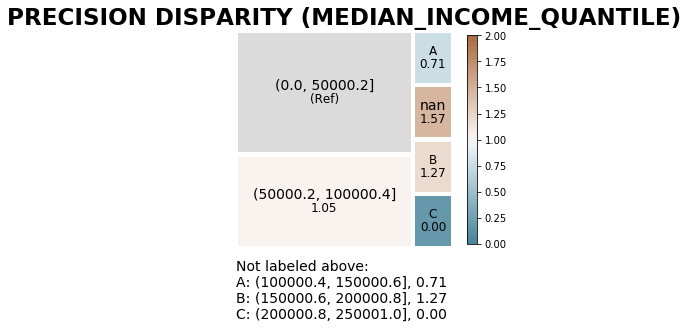

In [64]:
aqp.plot_disparity(majority_bdf, group_metric='precision_disparity', attribute_name='median_income_quantile', significance_alpha=0.05)


In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['median_income_quantile'], significance_alpha=0.05)

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['families_under_poverty_line'], significance_alpha=0.05)

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['black alone'], significance_alpha=0.05)

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['native alone'], significance_alpha=0.05)

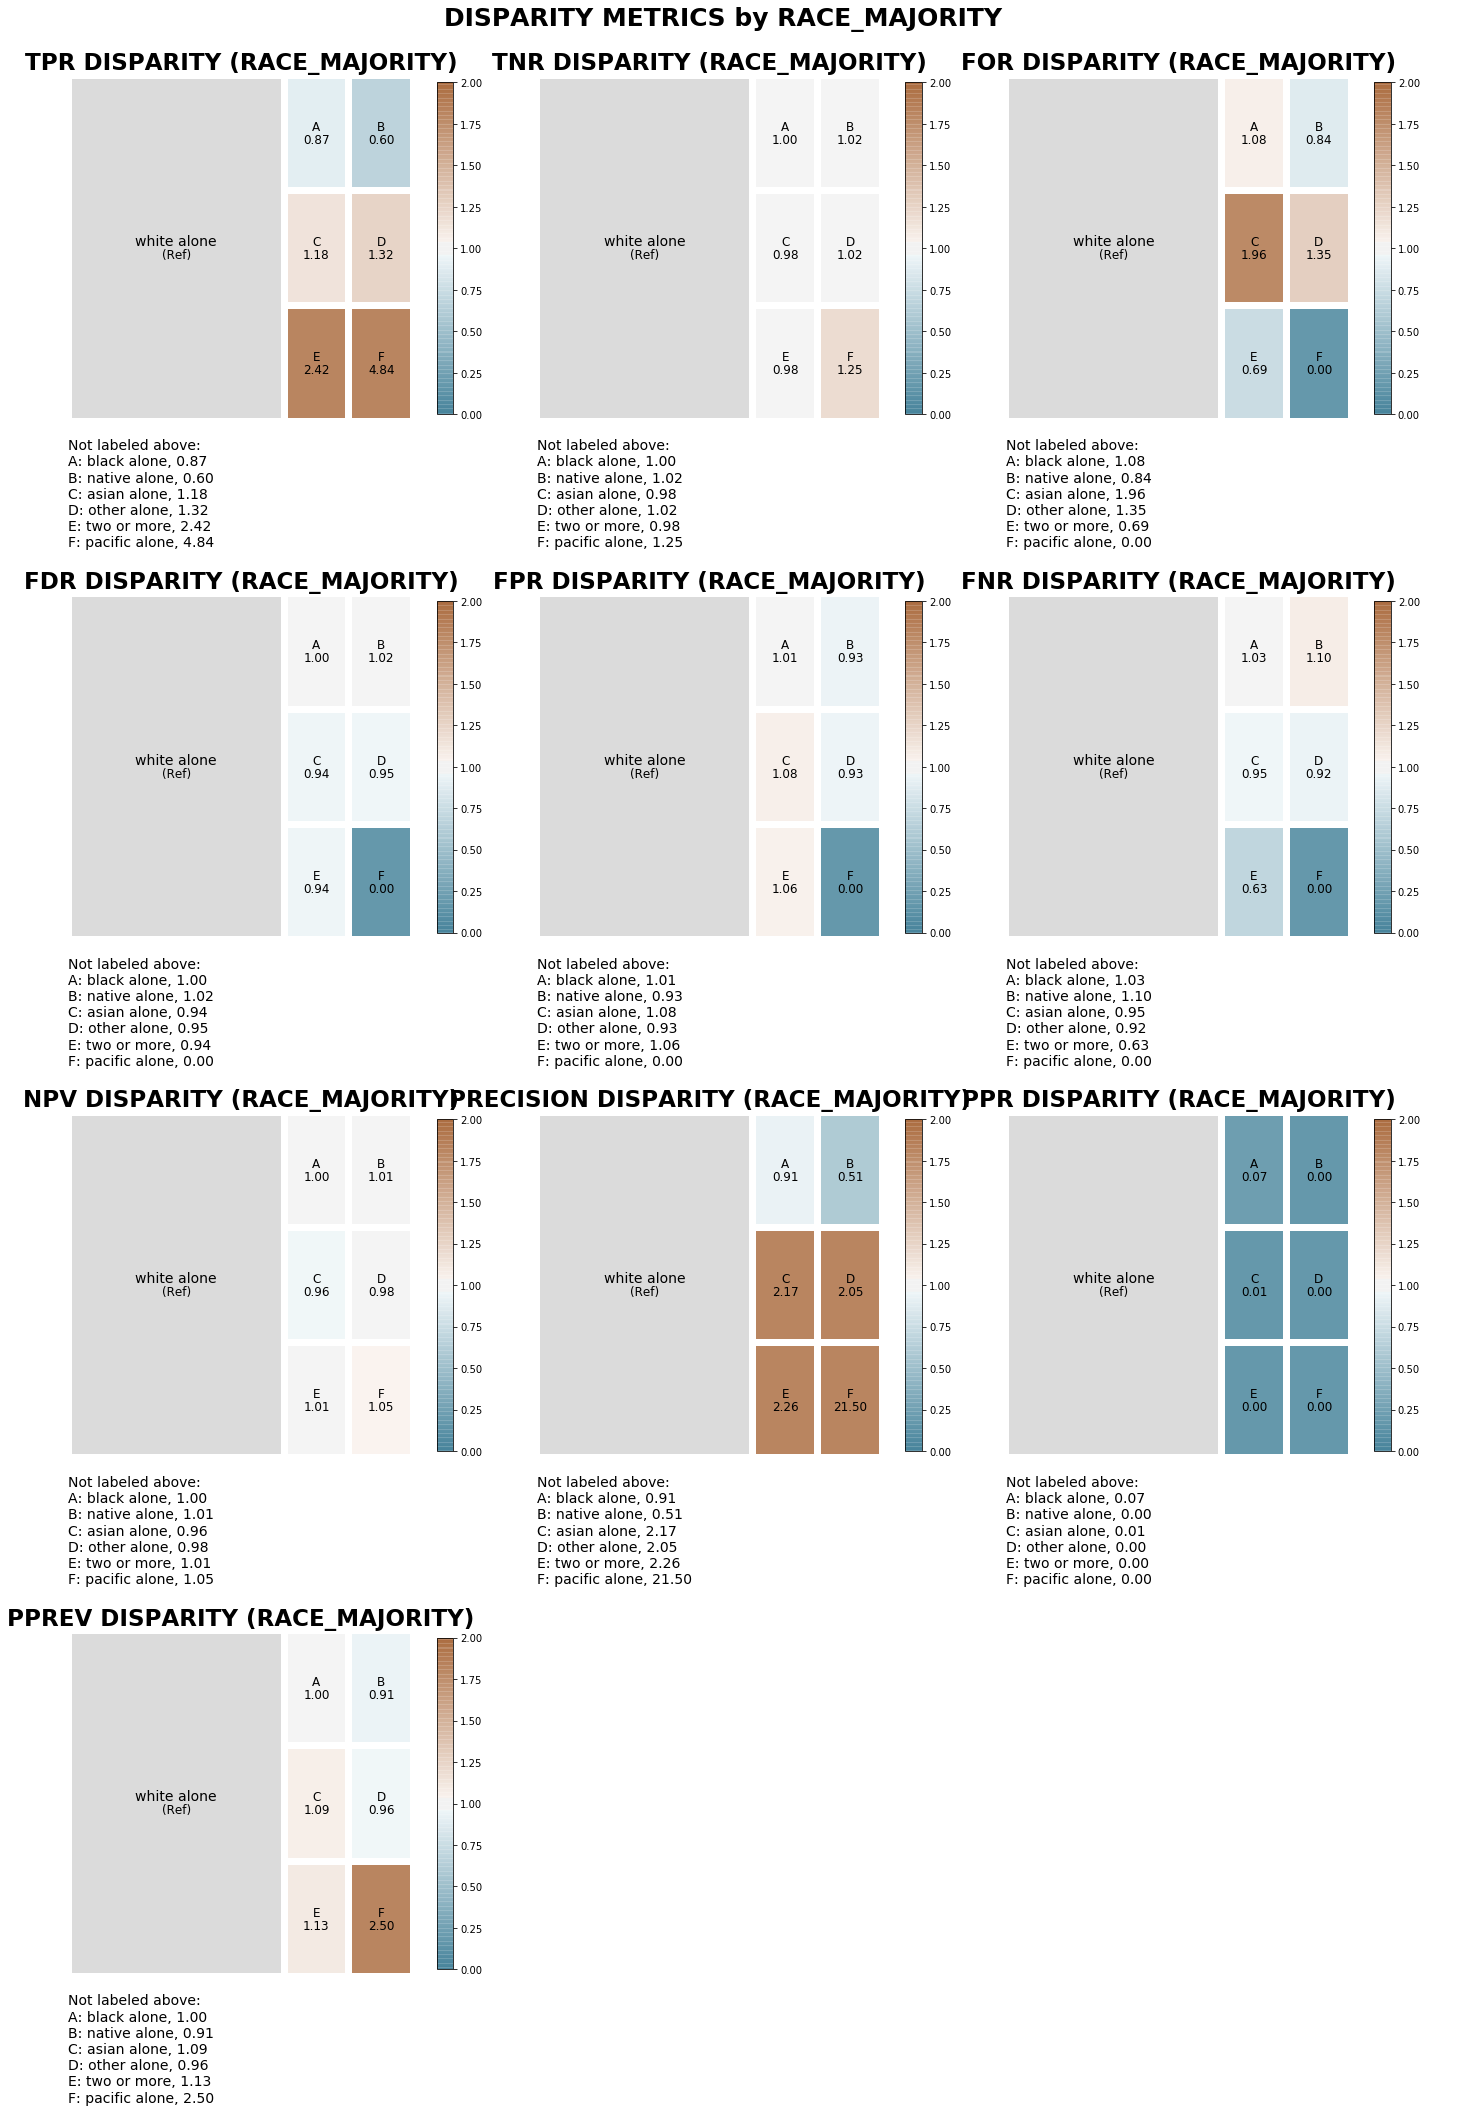

In [65]:
tm_capped = aqp.plot_disparity_all(hbdf, attributes=['race_majority'], metrics = 'all', significance_alpha=0.05)

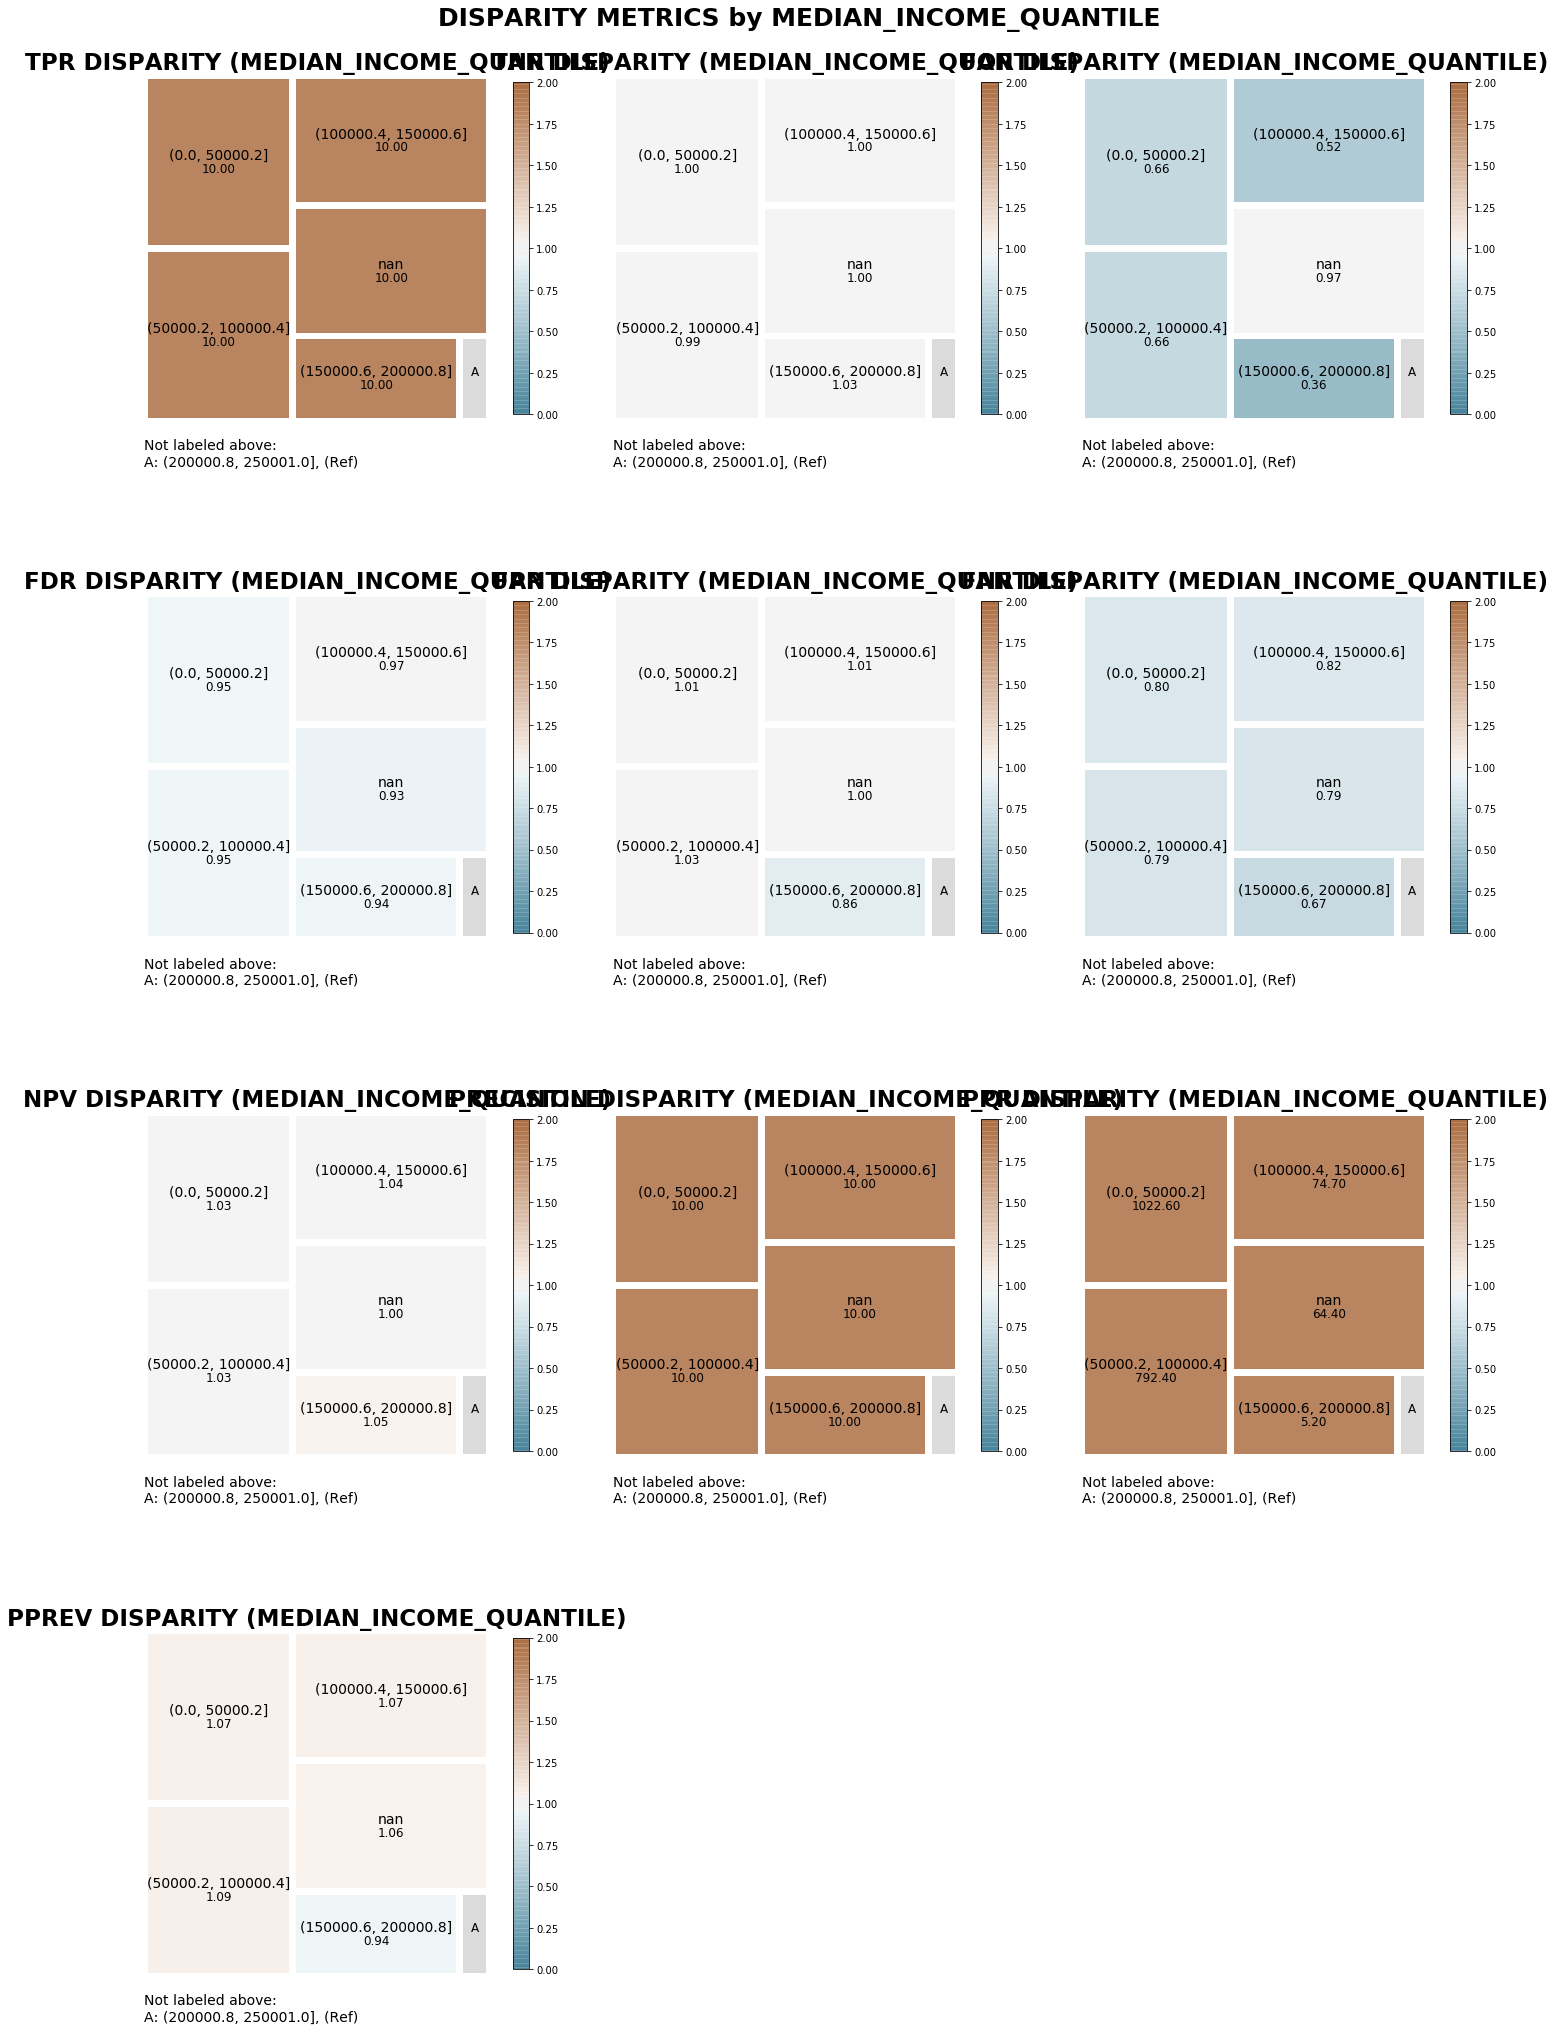

In [66]:
by_income = aqp.plot_disparity_all(hbdf, attributes=['median_income_quantile'], metrics = 'all', significance_alpha=0.05)

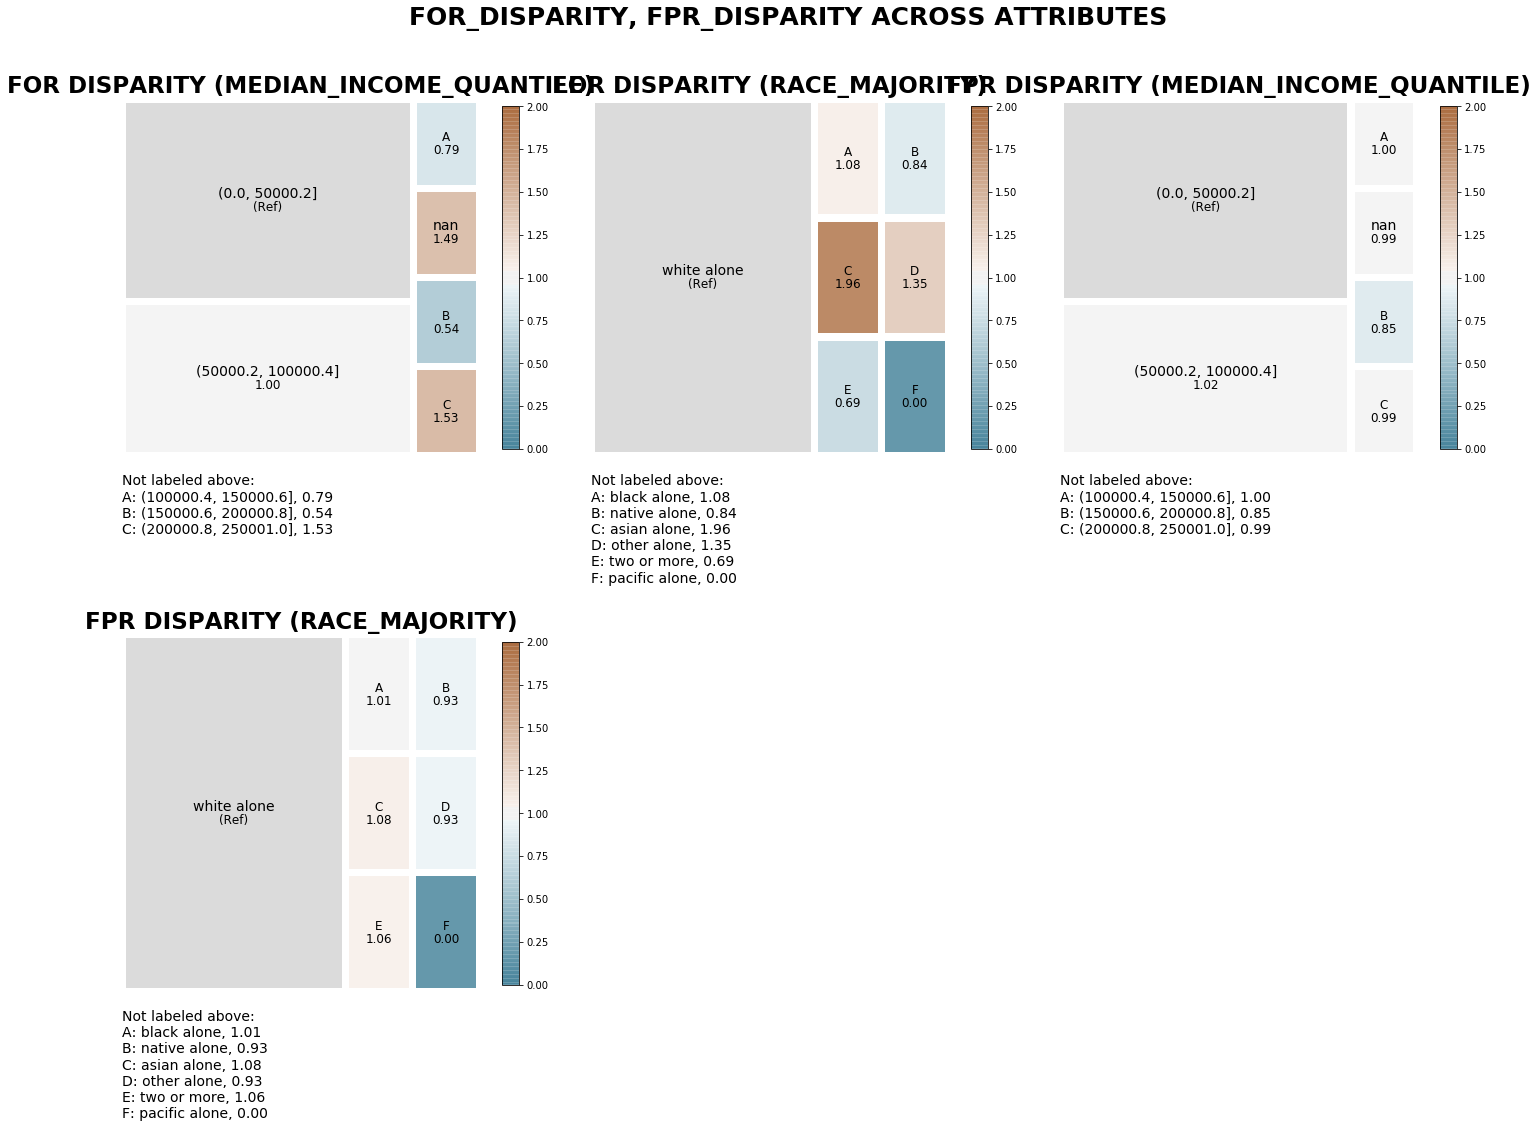

In [67]:
dp = aqp.plot_disparity_all(majority_bdf, metrics=['for_disparity', 'fpr_disparity'], significance_alpha=0.05)

In [68]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [69]:
parity_detrminations = f.list_parities(fdf)

In [70]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,NPV Parity,Equalized Odds,FPR Parity,TPR Parity,TNR Parity,FOR Parity,Statistical Parity,Precision Parity,FNR Parity,Supervised Fairness,TypeI Parity,FDR Parity,Unsupervised Fairness,TypeII Parity,Impact Parity
0,median_income_quantile,"(0.0, 50000.2]",0.201127,0.80148,0.0446734,0.954625,0.19852,0.798873,0.955327,0.0453745,0.521655,0.198636,0.0448126,1022.6,1.07264,10,0.954625,0.655209,1.01245,0.798873,10,0.996963,1.02523,True,False,True,False,True,False,False,False,False,False,True,True,False,False,True
1,median_income_quantile,"(100000.4, 150000.6]",0.183206,0.800991,0.0354657,0.967871,0.199009,0.816794,0.964534,0.0321285,0.0381064,0.198459,0.0348034,74.7,1.07168,10,0.967871,0.520164,1.01495,0.816794,10,0.996355,1.03511,True,False,True,False,True,False,False,False,True,False,True,True,False,False,True
2,median_income_quantile,"(150000.6, 200000.8]",0.333333,0.831034,0.0242915,0.942308,0.168966,0.666667,0.975709,0.0576923,0.00265266,0.173913,0.0301003,5.2,0.93913,10,0.942308,0.356275,0.861724,0.666667,10,1.03373,1.0471,True,False,True,False,True,False,False,False,False,False,True,True,False,False,True
3,median_income_quantile,"(200000.8, 250001.0]",0,0.803922,0.0681818,1,0.196078,1,0.931818,0,0.000510126,0.185185,0.0555556,1,1,nan,1,1,1,1,nan,1,1,True,False,True,nan,True,True,True,nan,True,True,True,True,True,True,True
4,median_income_quantile,"(50000.2, 100000.4]",0.212479,0.798046,0.0448751,0.952297,0.201954,0.787521,0.955125,0.0477032,0.404224,0.202432,0.0454476,792.4,1.09313,10,0.952297,0.658168,1.02996,0.787521,10,0.992692,1.02501,True,False,True,False,True,False,False,False,False,False,True,True,False,False,True
5,median_income_quantile,nan,0.209091,0.803677,0.0663616,0.928571,0.196323,0.790909,0.933638,0.0714286,0.0328521,0.197183,0.0673607,64.4,1.06479,10,0.928571,0.973303,1.00125,0.790909,10,0.999696,1.00195,True,False,True,False,True,True,False,False,False,False,True,True,False,False,True
6,race_majority,asian alone,0.243902,0.784504,0.0873239,0.89899,0.215496,0.756098,0.912676,0.10101,0.00505025,0.218062,0.0903084,0.00547476,1.09026,2.1719,0.942839,1.95601,1.07912,0.953025,1.18036,0.980258,0.955325,True,True,True,True,True,False,False,False,True,False,True,True,False,False,True
7,race_majority,black alone,0.179661,0.798996,0.0482456,0.957735,0.201004,0.820339,0.951754,0.0422648,0.0639698,0.2,0.0470494,0.0693469,0.999956,0.908768,1.00445,1.08068,1.00655,1.034,0.869465,0.998366,0.99623,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True
8,race_majority,native alone,0.125,0.814898,0.0373333,0.97619,0.185102,0.875,0.962667,0.0238095,0.00428506,0.183007,0.0348584,0.00464525,0.914992,0.511947,1.02381,0.836248,0.926914,1.1029,0.604935,1.01824,1.00765,True,False,True,False,True,True,False,False,True,True,True,True,False,True,True
9,race_majority,other alone,0.272727,0.813725,0.0603774,0.904762,0.186275,0.727273,0.939623,0.0952381,0.00321379,0.192073,0.0670732,0.00348394,0.960323,2.04779,0.948893,1.35242,0.932788,0.916692,1.31986,1.01677,0.983531,True,False,True,False,True,False,False,False,True,False,True,True,False,False,True


In [71]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,median_income_quantile,False,True,True,True,False,False,False,True,True,False,True,False,False,False,False
1,1,binary 0/1,race_majority,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [72]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

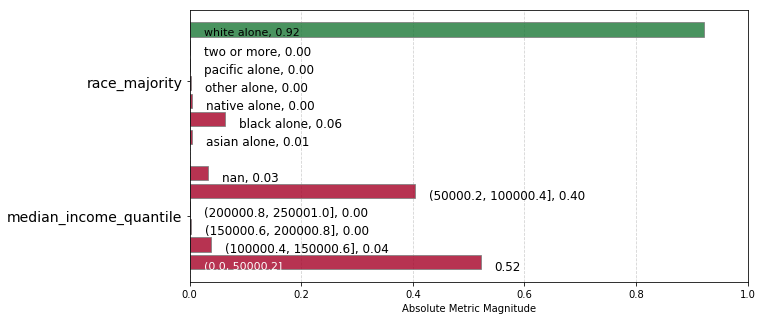

In [73]:
z = aqp.plot_fairness_group(fdf, group_metric='ppr')

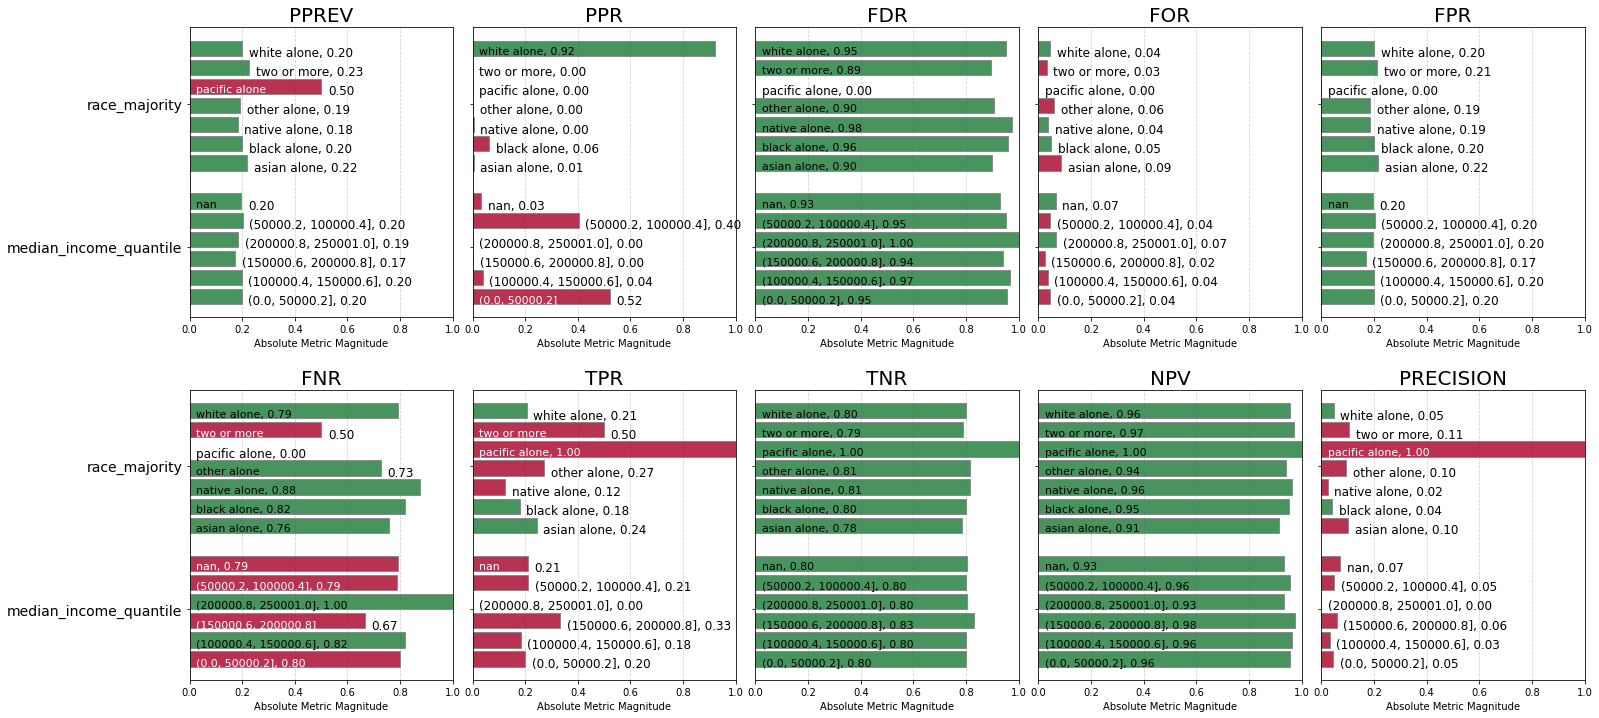

In [74]:
fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")

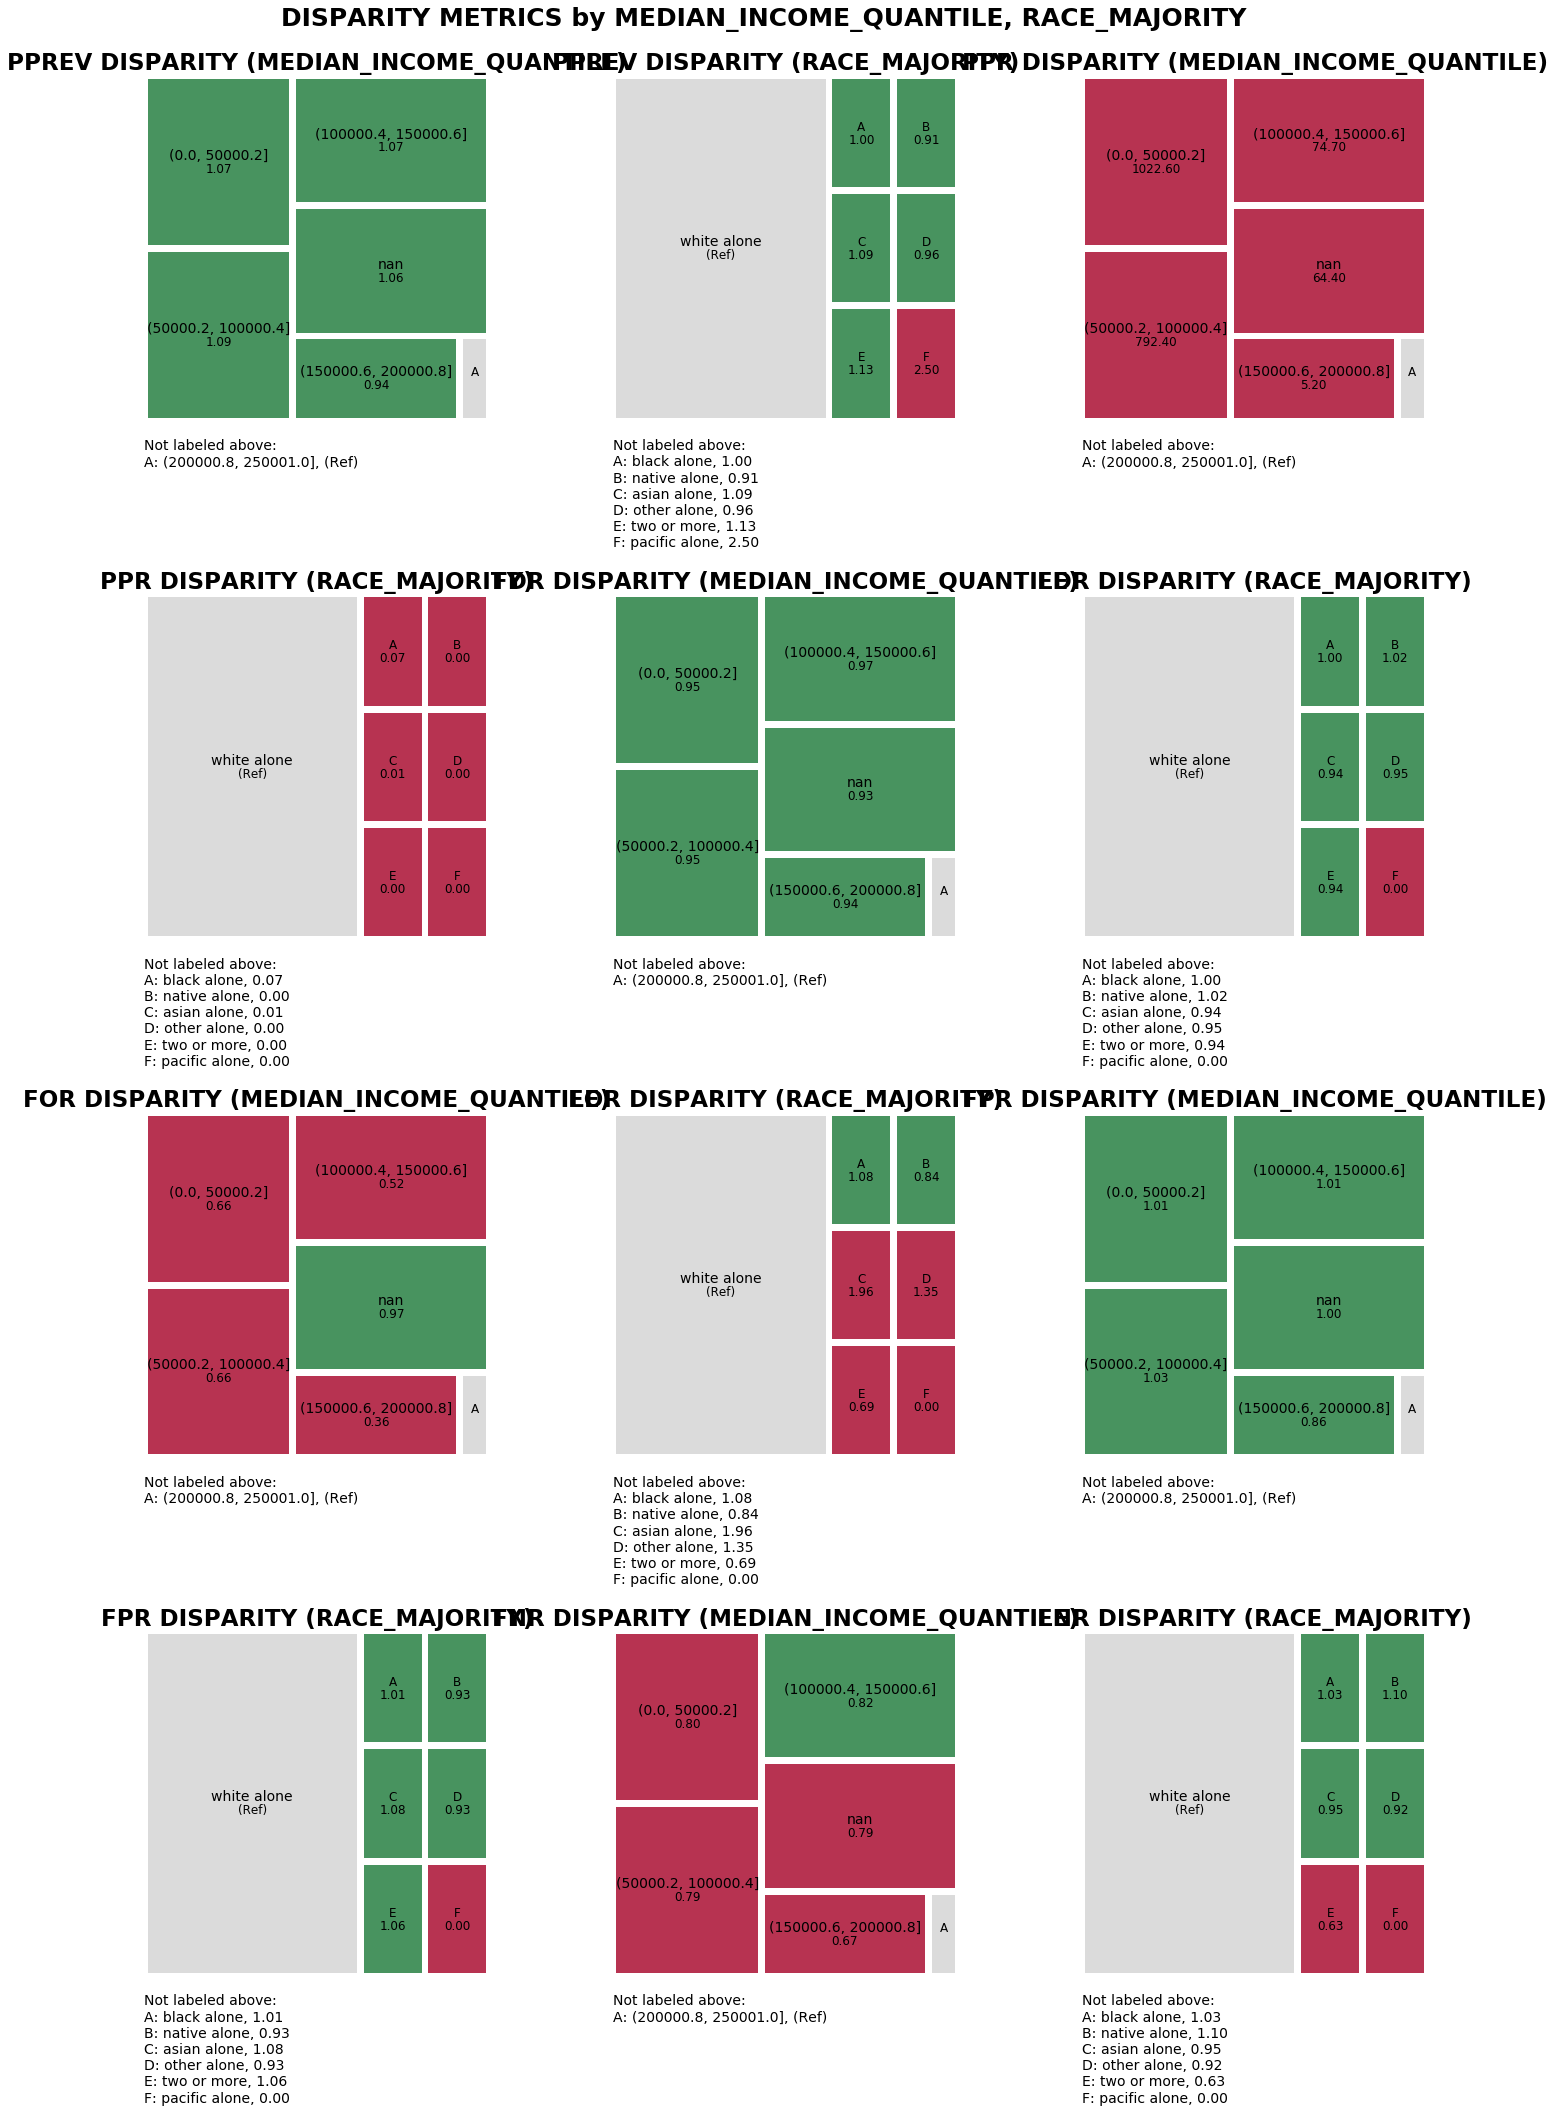

In [77]:
n_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['median_income_quantile', 'race_majority'], 
                                       significance_alpha=0.05)